<a href="https://colab.research.google.com/github/GiacomoMM/blood-cell-classification-detection/blob/main/Progetto_LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import torchvision
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


#Data download

In [2]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
#se ci sono gia i dati
if data_path.is_dir():
  print("directory esiste già")
else:
  data_path.mkdir(parents=True,exist_ok=True)
  print("directory data creata")

with open(data_path / "PBC_dataset_normal_DIB_224.zip","wb") as f:
  request=requests.get("https://github.com/GiacomoMM/blood-cell-classification-detection/raw/main/PBC_dataset_normal_DIB_224.zip?download=")
  print("downloading dataset")
  f.write(request.content)

with zipfile.ZipFile(data_path / "PBC_dataset_normal_DIB_224.zip","r") as zip_f:
  print("unzipping dataset")
  zip_f.extractall(data_path)


directory data creata
downloading dataset
unzipping dataset


In [3]:
import os
def directory(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"Ci sono {len(dirname)} directory e {len(filename)} immagini in {dirpath}")

In [4]:
directory(data_path)

Ci sono 1 directory e 1 immagini in data
Ci sono 8 directory e 0 immagini in data/PBC_dataset_normal_DIB_224
Ci sono 0 directory e 2348 immagini in data/PBC_dataset_normal_DIB_224/platelet
Ci sono 0 directory e 1218 immagini in data/PBC_dataset_normal_DIB_224/basophil
Ci sono 0 directory e 1420 immagini in data/PBC_dataset_normal_DIB_224/monocyte
Ci sono 0 directory e 1214 immagini in data/PBC_dataset_normal_DIB_224/lymphocyte
Ci sono 0 directory e 3329 immagini in data/PBC_dataset_normal_DIB_224/neutrophil
Ci sono 0 directory e 2895 immagini in data/PBC_dataset_normal_DIB_224/ig
Ci sono 0 directory e 3117 immagini in data/PBC_dataset_normal_DIB_224/eosinophil
Ci sono 0 directory e 1551 immagini in data/PBC_dataset_normal_DIB_224/erythroblast


#Analisi Dati

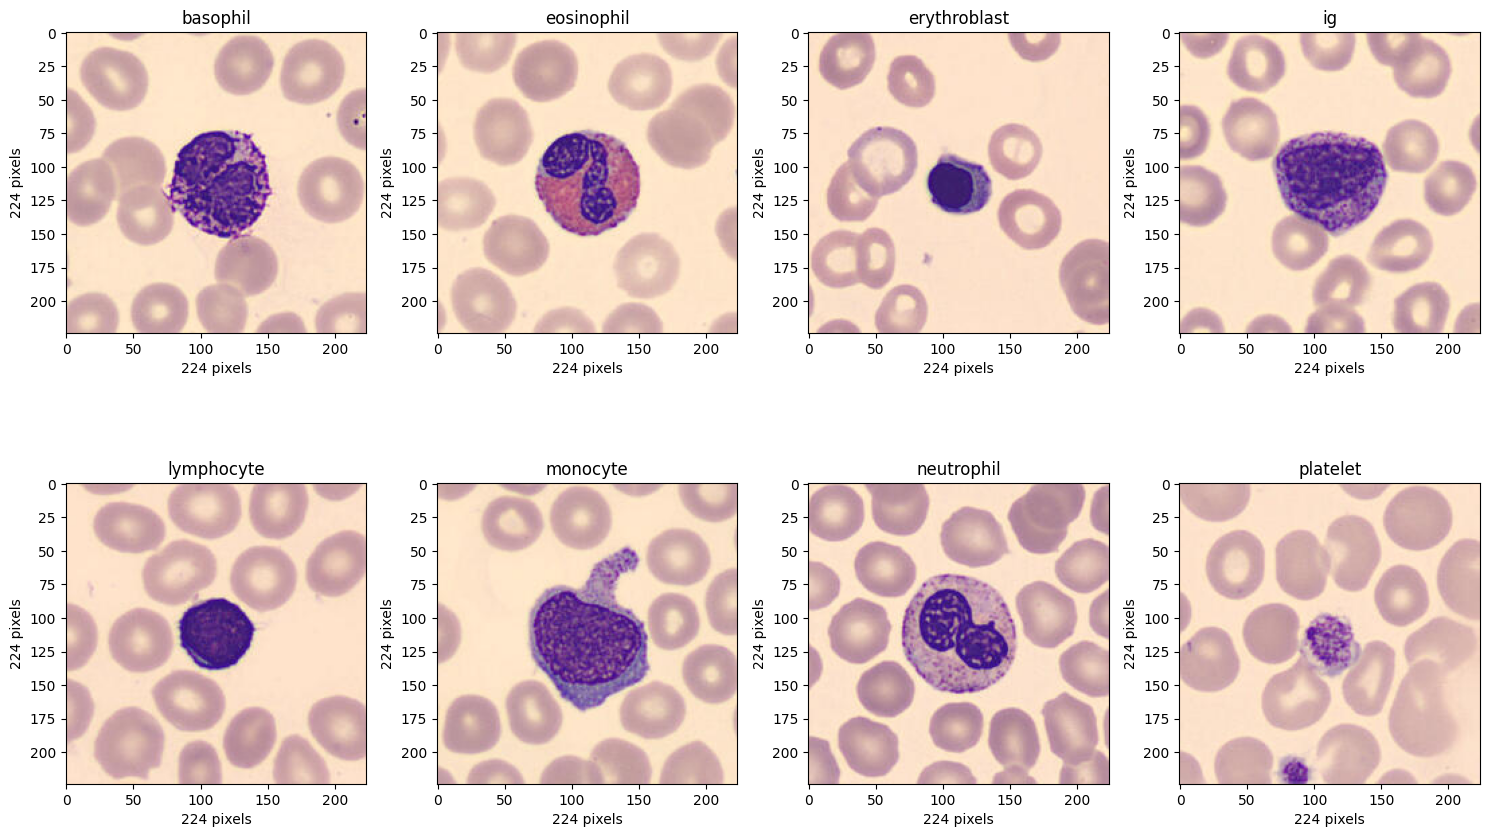

In [5]:
import random
from PIL import Image
import matplotlib.pyplot as plt

lista_path=list()
lista_classi=list()

image_basophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/basophil/")
image_basophil_path_list= list(image_basophil_path.glob("*.jpg"))
random_image_basophil_path=random.choice(image_basophil_path_list)
#image_basophil=Image.open(random_image_basophil_path)
lista_classi.append(random_image_basophil_path.parent.stem)
lista_path.append(random_image_basophil_path)

image_eosinophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/eosinophil/")
image_eosinophil_path_list= list(image_eosinophil_path.glob("*.jpg"))
random_image_eosinophil_path=random.choice(image_eosinophil_path_list)
#image_eosinophil=Image.open(random_image_eosinophil_path)
lista_classi.append(random_image_eosinophil_path.parent.stem)
lista_path.append(random_image_eosinophil_path)

image_erythroblast_path=Path("/content/data/PBC_dataset_normal_DIB_224/erythroblast/")
image_erythroblast_path_list= list(image_erythroblast_path.glob("*.jpg"))
random_image_erythroblast_path=random.choice(image_erythroblast_path_list)
#image_erythroblast=Image.open(random_image_erythroblast_path)
lista_classi.append(random_image_erythroblast_path.parent.stem)
lista_path.append(random_image_erythroblast_path)

image_ig_path=Path("/content/data/PBC_dataset_normal_DIB_224/ig/")
image_ig_path_list= list(image_ig_path.glob("*.jpg"))
random_image_ig_path=random.choice(image_ig_path_list)
#image_ig=Image.open(random_image_ig_path)
lista_classi.append(random_image_ig_path.parent.stem)
lista_path.append(random_image_ig_path)

image_lymphocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/lymphocyte/")
image_lymphocyte_path_list= list(image_lymphocyte_path.glob("*.jpg"))
random_image_lymphocyte_path=random.choice(image_lymphocyte_path_list)
#image_lymphocyte=Image.open(random_image_lymphocyte_path)
lista_classi.append(random_image_lymphocyte_path.parent.stem)
lista_path.append(random_image_lymphocyte_path)

image_monocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/monocyte/")
image_monocyte_path_list= list(image_monocyte_path.glob("*.jpg"))
random_image_monocyte_path=random.choice(image_monocyte_path_list)
#image_monocyte=Image.open(random_image_monocyte_path)
lista_classi.append(random_image_monocyte_path.parent.stem)
lista_path.append(random_image_monocyte_path)

image_neutrophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/neutrophil/")
image_neutrophil_path_list= list(image_neutrophil_path.glob("*.jpg"))
random_image_neutrophil_path=random.choice(image_neutrophil_path_list)
#image_neutrophil=Image.open(random_image_neutrophil_path)
lista_classi.append(random_image_neutrophil_path.parent.stem)
lista_path.append(random_image_neutrophil_path)

image_platelet_path=Path("/content/data/PBC_dataset_normal_DIB_224/platelet/")
image_platelet_path_list= list(image_platelet_path.glob("*.jpg"))
random_image_platelet_path=random.choice(image_platelet_path_list)
#image_platelet=Image.open(random_image_platelet_path)
lista_classi.append(random_image_platelet_path.parent.stem)
lista_path.append(random_image_platelet_path)


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,15))

for i in range(8):
  image =Image.open(lista_path[i])
  ax = axs[i // 4, i % 4]
  ax.imshow(image)
  ax.set_title(f"{lista_classi[i]}")
  width, height = image.size
  ax.set_xlabel(f"{width} pixels")
  ax.set_ylabel(f"{height} pixels")

plt.tight_layout(h_pad=-26.0)
plt.show()


In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

dataset = ImageFolder(root="/content/data/PBC_dataset_normal_DIB_224", transform=transform, allow_empty=False)
print(dataset.classes)
print(dataset.class_to_idx)
print(f"Numero totale di immagini: {len(dataset)}")


['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
Numero totale di immagini: 17092


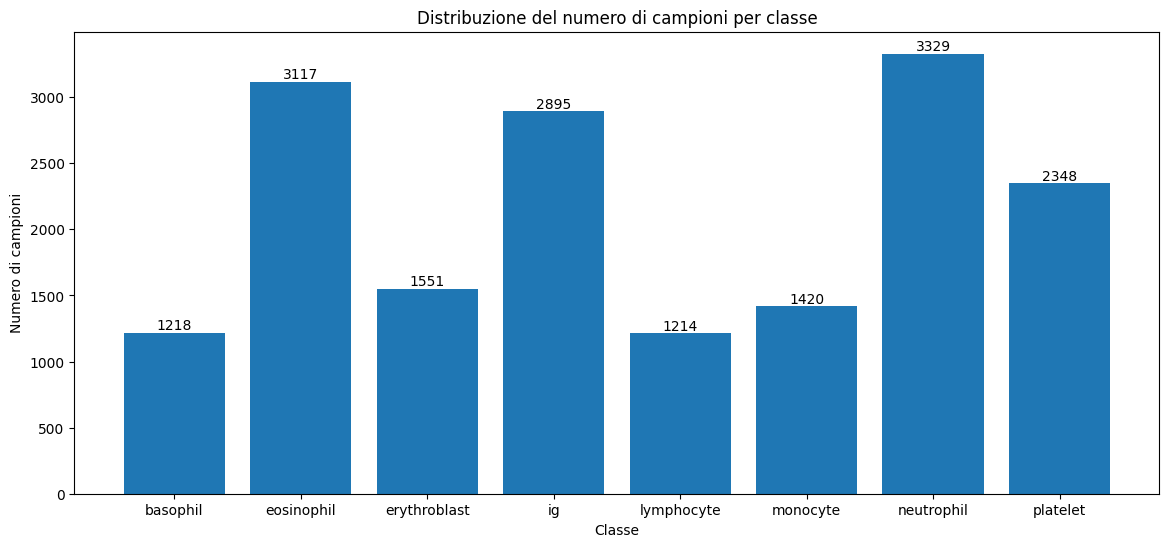

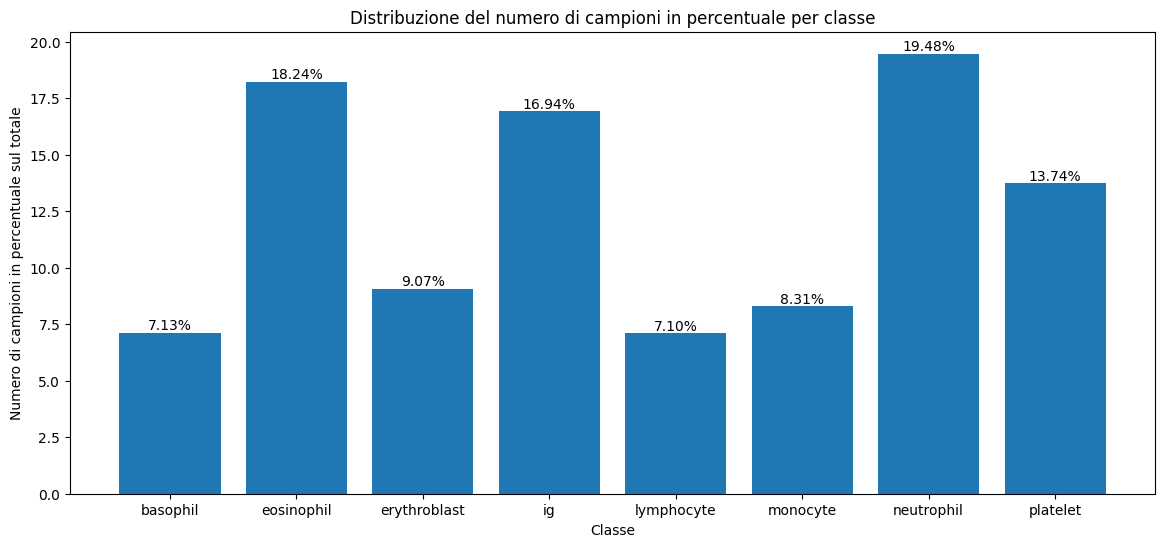

In [7]:
classes = dataset.classes
class_counts = [0]*8

for _, indx in dataset:
    class_counts[indx] += 1

plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

#percentuale sul totale
for i in range(len(class_counts)):
  class_counts[i]=class_counts[i]/len(dataset)*100


plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar,fmt="%.2f%%")
plt.xlabel("Classe")
plt.ylabel("Numero di campioni in percentuale sul totale")
plt.title("Distribuzione del numero di campioni in percentuale per classe")
plt.show()

#Manipolazione Dati

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

Using PyTorch version: 2.3.0+cu121  Device: cuda


In [9]:
from torch.utils.data import DataLoader,random_split,TensorDataset

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size= len(dataset)-train_size-val_size

dataset_loader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

data_loader, label_loader = next(iter(dataset_loader))

dataset_mix = TensorDataset(data_loader, label_loader)

In [10]:
c_label_train=0
c_label_val=0
c_label_test=0
while(c_label_train<8 and c_label_val<8 and c_label_test<8):
  train_dataset,val_dataset,test_dataset = random_split(dataset_mix,[train_size,val_size,test_size])
  labels=[]
  for idx,(img,label) in enumerate(train_dataset):
    if label not in labels:
      labels.append(label)
      c_label_train=c_label_train+1
  print(f"c_label_train: {c_label_train}")
  labels=[]
  for idx,(img,label) in enumerate(val_dataset):
    if label not in labels:
      labels.append(label)
      c_label_val=c_label_val+1
  print(f"c_label_val: {c_label_val}")
  labels=[]
  for idx,(img,label) in enumerate(test_dataset):
    if label not in labels:
      labels.append(label)
      c_label_test=c_label_test+1
  print(f"c_label_test: {c_label_test}")

c_label_train: 8
c_label_val: 8
c_label_test: 8


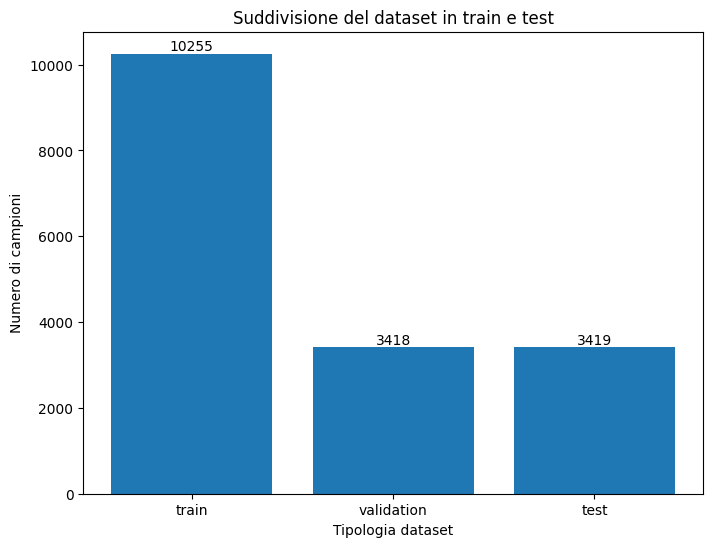

In [11]:
plt.figure(figsize=(8, 6))
bar=plt.bar(["train","validation", "test"], [len(train_dataset.indices),len(val_dataset.indices),len(test_dataset.indices)])
plt.bar_label(bar)
plt.xlabel("Tipologia dataset")
plt.ylabel("Numero di campioni")
plt.title("Suddivisione del dataset in train e test")
plt.show()

In [12]:
#DataLoader
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader=DataLoader(test_dataset, batch_size=64, shuffle=False)

dataiter = iter(train_loader)
images, labels = next(dataiter)
print("tipologia loader: ",type(images))
print("shape immagine: ",images.shape)
print("label shape: ",labels.shape)

tipologia loader:  <class 'torch.Tensor'>
shape immagine:  torch.Size([64, 3, 64, 64])
label shape:  torch.Size([64])


In [13]:
data = []
for idx, (image, label) in enumerate(train_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
train_pd = pd.DataFrame(data)
train_pd = train_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(val_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
val_pd = pd.DataFrame(data)
val_pd = val_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(test_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
test_pd = pd.DataFrame(data)
test_pd = val_pd.sample(frac=1).reset_index(drop=True)

train_pd.head()

image         label
0  [0.9843137, 0.99607843, 0.99607843, 1.0, 1.0, ...    neutrophil
1  [0.9490196, 0.92156863, 0.8980392, 0.8784314, ...      monocyte
2  [1.0, 1.0, 0.96862745, 0.8117647, 0.7254902, 0...            ig
3  [0.99215686, 0.95686275, 0.8745098, 0.8509804,...  erythroblast
4  [0.7764706, 0.7764706, 0.78039217, 0.7882353, ...    neutrophil

In [14]:
#divisione feature
X_train_pd =train_pd["image"]
y_train_pd =train_pd["label"]

X_val_pd =val_pd["image"]
y_val_pd =val_pd["label"]

X_test_pd =test_pd["image"]
y_test_pd =test_pd["label"]
print(len(y_train_pd.unique()))
print(len(y_val_pd.unique()))
print(len(y_test_pd.unique()))

8
8
8


#Modello 1: Logistic Regression

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#ricerca iperparametro learning rate
warnings.filterwarnings("ignore",category=ConvergenceWarning)
learning_rate=100
best_rate=[]
best_accuracy=[]
for i in range(7):
  model = LogisticRegression(max_iter=5,solver="sag",n_jobs=-1,C=learning_rate)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"Accuracy: {accuracy} con learning rate: {learning_rate}")
  best_rate.append(learning_rate)
  best_accuracy.append(accuracy)
  learning_rate=learning_rate/10


Accuracy: 0.6132241076653013 con learning rate: 100
Accuracy: 0.7094792276184904 con learning rate: 10.0
Accuracy: 0.7129900526623757 con learning rate: 1.0
Accuracy: 0.6772966647162083 con learning rate: 0.1
Accuracy: 0.6799297834991223 con learning rate: 0.01
Accuracy: 0.6451141018139263 con learning rate: 0.001
Accuracy: 0.7217671152720889 con learning rate: 0.0001


miglior accuracy: 0.7217671152720889
miglior rate: 0.0001


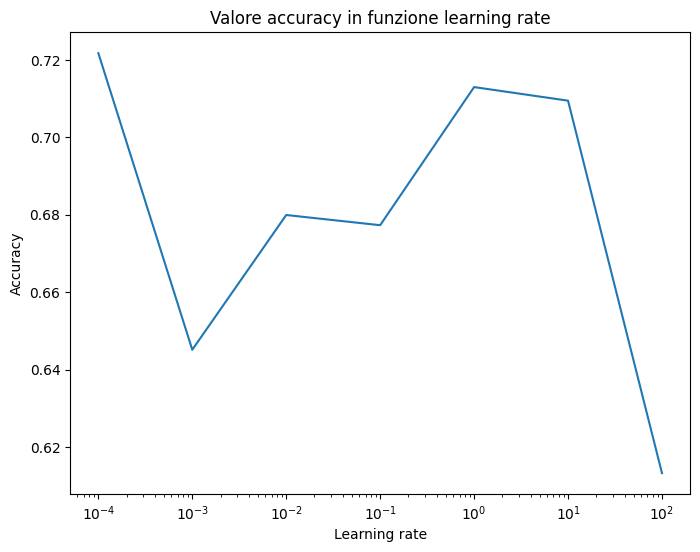

In [ ]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
learning_rate=best_rate[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior rate: {learning_rate}")

plt.figure(figsize=(8, 6))
plt.plot(best_rate,best_accuracy)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione learning rate")
plt.show()

In [ ]:
model = LogisticRegression(max_iter=20,solver="sag",n_jobs=-1,C=learning_rate)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.7399063779988297
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.58      0.35      0.44       215
  eosinophil       0.86      0.88      0.87       620
erythroblast       0.79      0.66      0.72       294
          ig       0.52      0.67      0.58       611
  lymphocyte       0.71      0.72      0.71       253
    monocyte       0.56      0.27      0.36       283
  neutrophil       0.79      0.86      0.82       665
    platelet       0.95      0.99      0.97       477

    accuracy                           0.74      3418
   macro avg       0.72      0.67      0.69      3418
weighted avg       0.74      0.74      0.73      3418



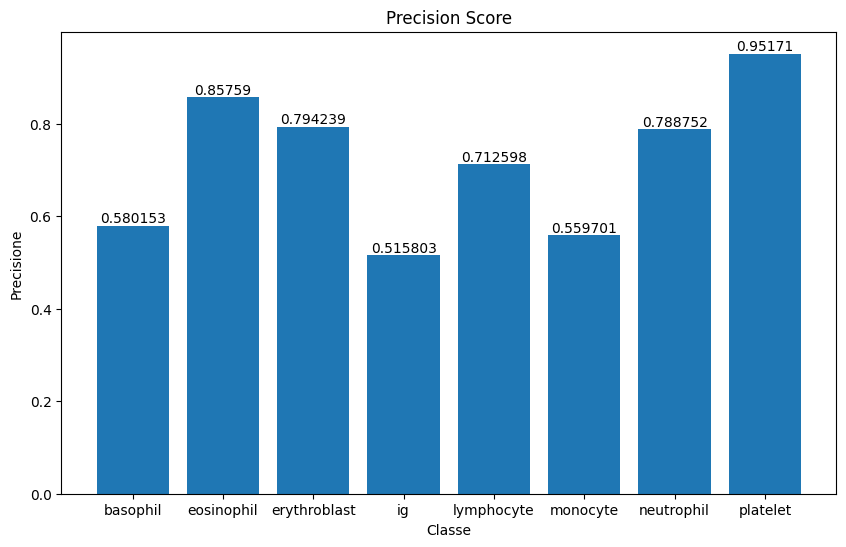

In [ ]:
from sklearn.metrics import precision_score
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

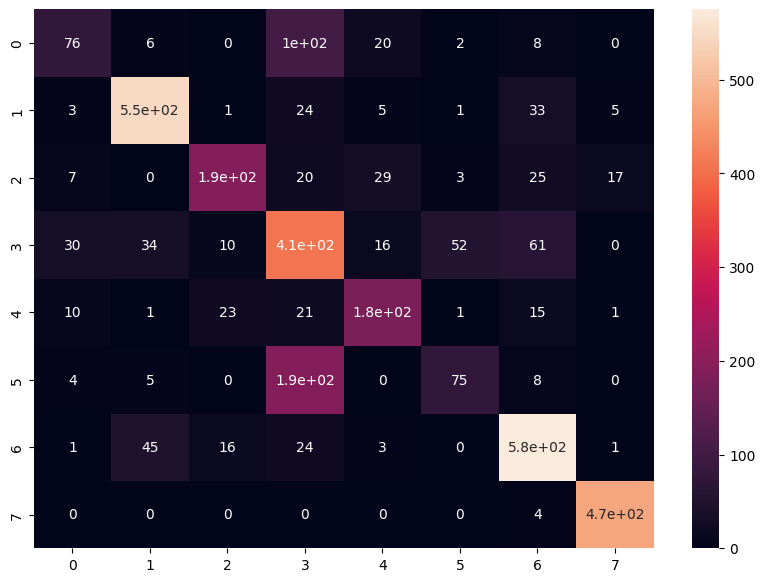

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

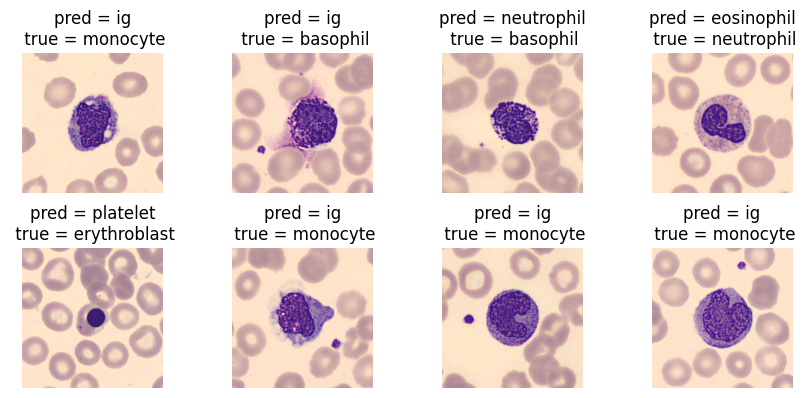

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

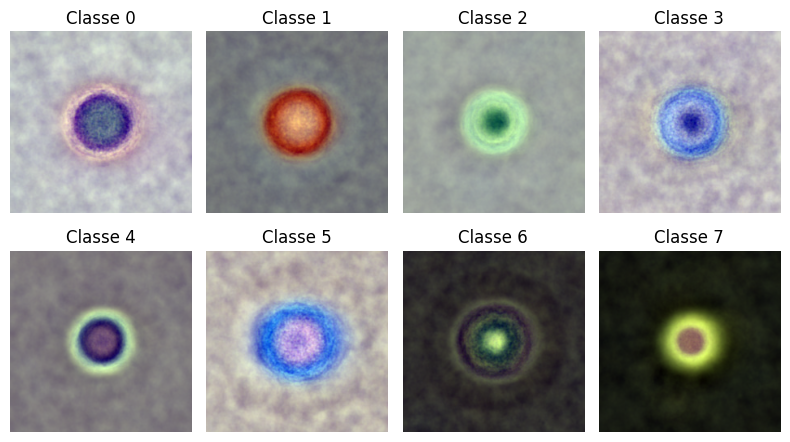

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#coefficienti
coefficients = model.coef_
image_shape = (3,224,224)
n_classes = coefficients.shape[0]
images = []
scaler = MinMaxScaler()

plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(len(coefficients)):
  im = scaler.fit_transform(coefficients[i].reshape(-1, 1))
  im=im.reshape(3,224,224).T
  ax = axs[i // 4, i % 4]
  im=ax.imshow(im)
  ax.set_title(f"Classe {i}")
  ax.axis("off")
plt.tight_layout(h_pad=-15.0)
plt.show()

#Modello 2:KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k=[]
best_accuracy=[]
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"accuracy: {accuracy} con k: {i}")
  best_k.append(i)
  best_accuracy.append(accuracy)

accuracy: 0.15974253949678174 con k: 1
accuracy: 0.08191925102399064 con k: 2
accuracy: 0.1301930953774137 con k: 3
accuracy: 0.14423639555295495 con k: 4
accuracy: 0.08250438853130486 con k: 5
accuracy: 0.12229373902867174 con k: 6
accuracy: 0.10912814511410181 con k: 7
accuracy: 0.11527208894090112 con k: 8
accuracy: 0.09274429490930369 con k: 9


miglior accuracy: 0.15974253949678174
miglior numero di neighbors: 1


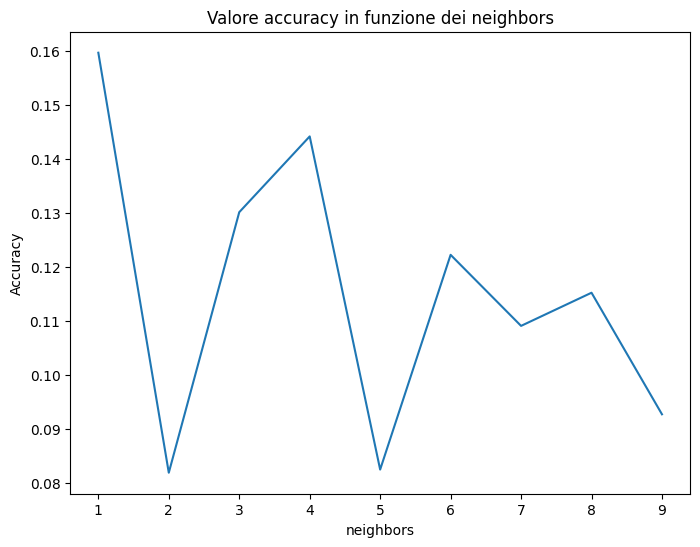

In [ ]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
k_valore=best_k[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior numero di neighbors: {k_valore}")

plt.figure(figsize=(8, 6))
plt.plot(best_k,best_accuracy)
plt.xlabel("neighbors")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione dei neighbors")
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=k_valore,n_jobs=-1)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.1617905207723815
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.07      0.08      0.07       215
  eosinophil       0.18      0.07      0.11       620
erythroblast       0.00      0.00      0.00       294
          ig       0.18      0.18      0.18       611
  lymphocyte       0.00      0.00      0.00       253
    monocyte       0.09      0.08      0.09       283
  neutrophil       0.19      0.36      0.25       665
    platelet       0.15      0.24      0.18       477

    accuracy                           0.16      3418
   macro avg       0.11      0.13      0.11      3418
weighted avg       0.13      0.16      0.14      3418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


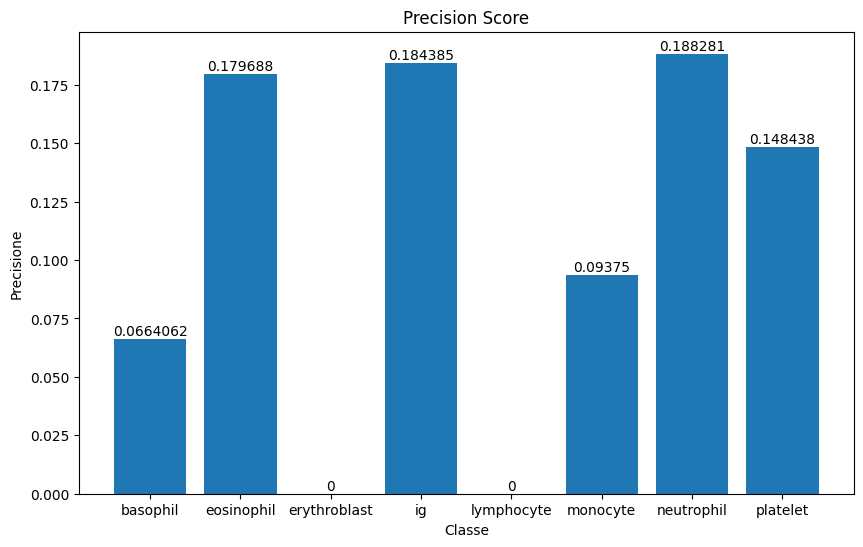

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

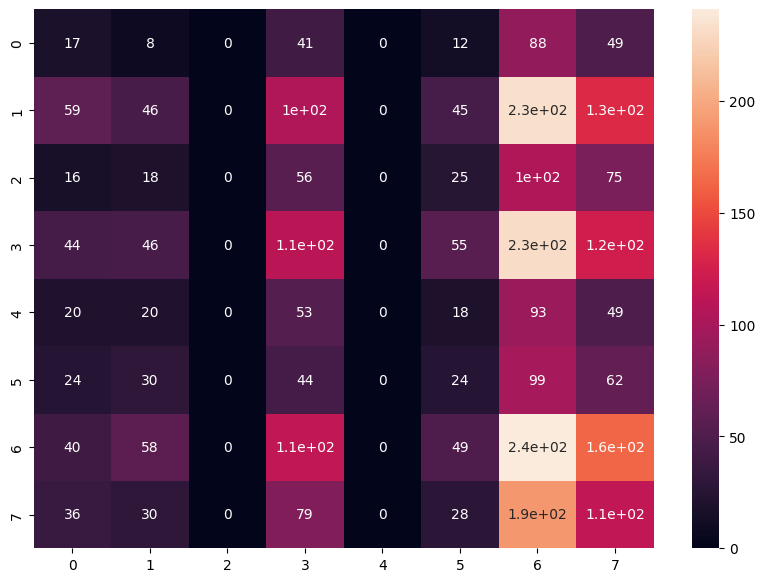

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

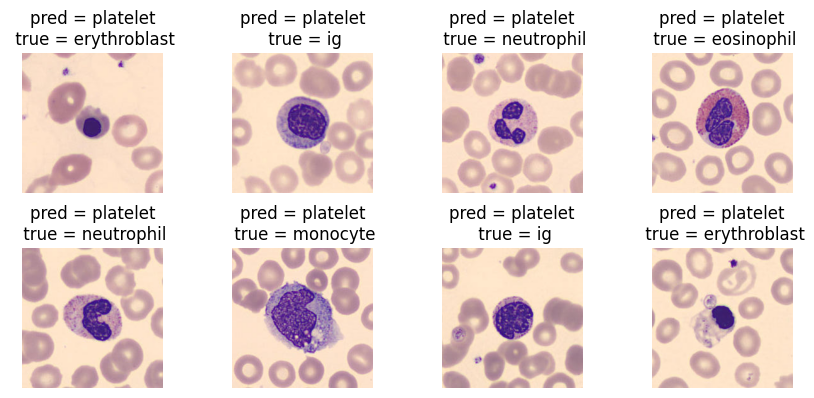

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 3: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

profondita=[]
best_accuracy=[]

for i in range(1,20):
  model = DecisionTreeClassifier(criterion="entropy",max_depth=i)
  model = model.fit(X_train_pd.to_list(),y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"{accuracy} alla profondita {i}")
  if(i>=2 and best_accuracy[i-2]>accuracy):
    profondita.append(i)
    best_accuracy.append(accuracy)
    break
  profondita.append(i)
  best_accuracy.append(accuracy)

0.3025160912814511 alla profondita 1
0.43358689291983615 alla profondita 2
0.5166764189584553 alla profondita 3
0.5629022820362786 alla profondita 4
0.6190754827384435 alla profondita 5
0.6299005266237566 alla profondita 6
0.655061439438268 alla profondita 7
0.6609128145114102 alla profondita 8
0.6500877706260971 alla profondita 9


miglior accuracy: 0.6609128145114102
miglior profondita: 8


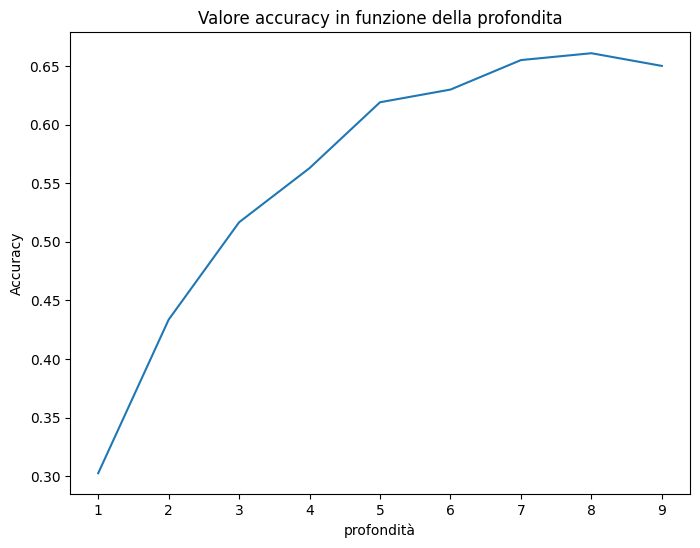

In [ ]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
profondita_best=profondita[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior profondita: {profondita_best}")

plt.figure(figsize=(8, 6))
plt.plot(profondita,best_accuracy)
plt.xlabel("profondità")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione della profondita")
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=profondita_best)
model = model.fit(X_train_pd.to_list(),y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.657694558221182
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.32      0.23      0.27       215
  eosinophil       0.79      0.73      0.76       620
erythroblast       0.69      0.69      0.69       294
          ig       0.47      0.54      0.50       611
  lymphocyte       0.67      0.68      0.67       253
    monocyte       0.41      0.31      0.35       283
  neutrophil       0.67      0.76      0.72       665
    platelet       0.94      0.94      0.94       477

    accuracy                           0.66      3418
   macro avg       0.62      0.61      0.61      3418
weighted avg       0.65      0.66      0.65      3418



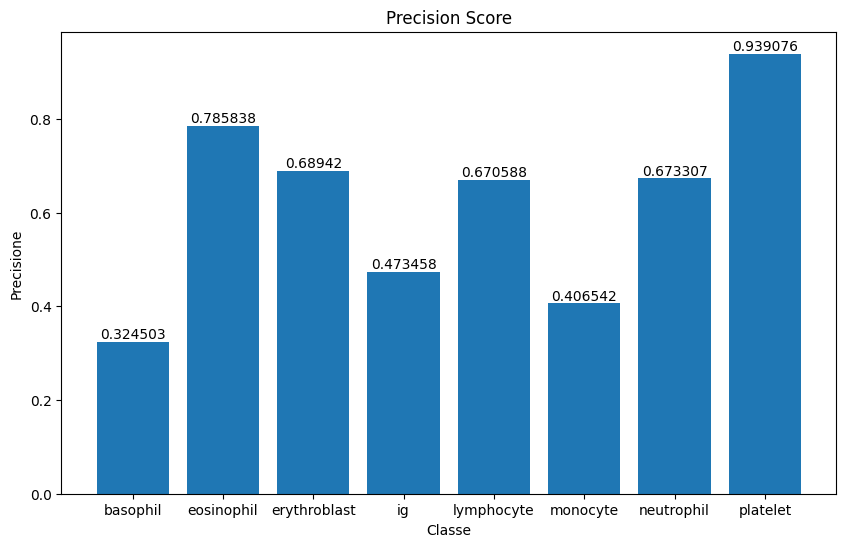

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

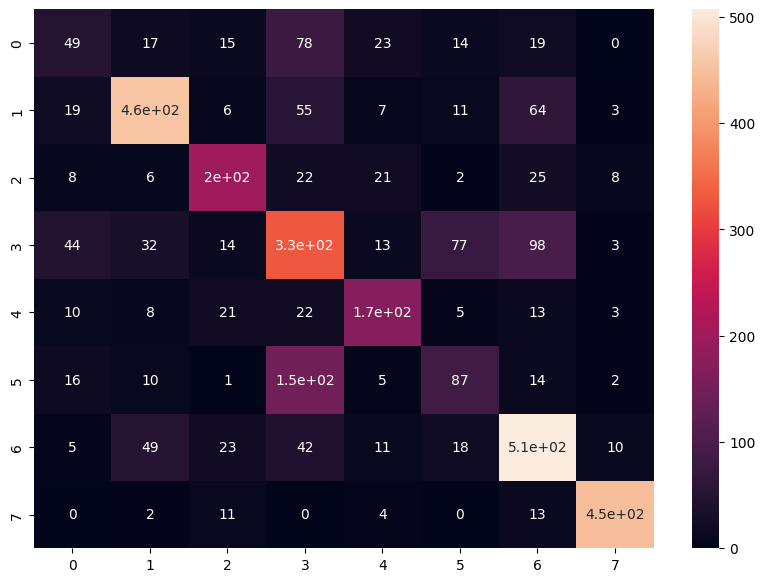

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

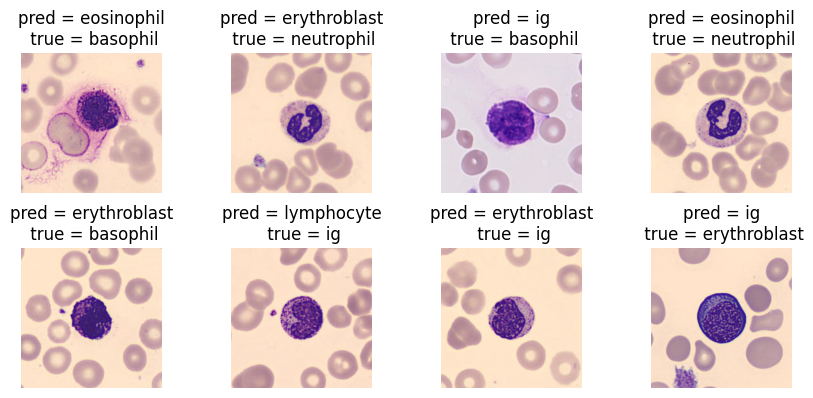

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 4:Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="entropy",n_jobs=-1)
model.fit(X_train_pd.to_list(),y_train_pd)
y_pred=model.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.8361614979520188
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.83      0.48      0.61       215
  eosinophil       0.93      0.94      0.93       620
erythroblast       0.93      0.80      0.86       294
          ig       0.64      0.82      0.72       611
  lymphocyte       0.81      0.83      0.82       253
    monocyte       0.83      0.44      0.57       283
  neutrophil       0.85      0.94      0.89       665
    platelet       0.98      1.00      0.99       477

    accuracy                           0.84      3418
   macro avg       0.85      0.78      0.80      3418
weighted avg       0.85      0.84      0.83      3418



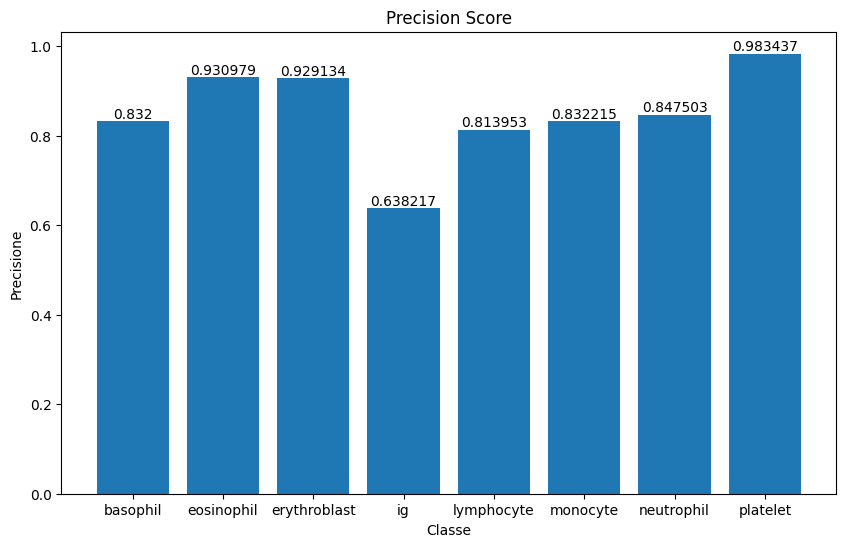

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

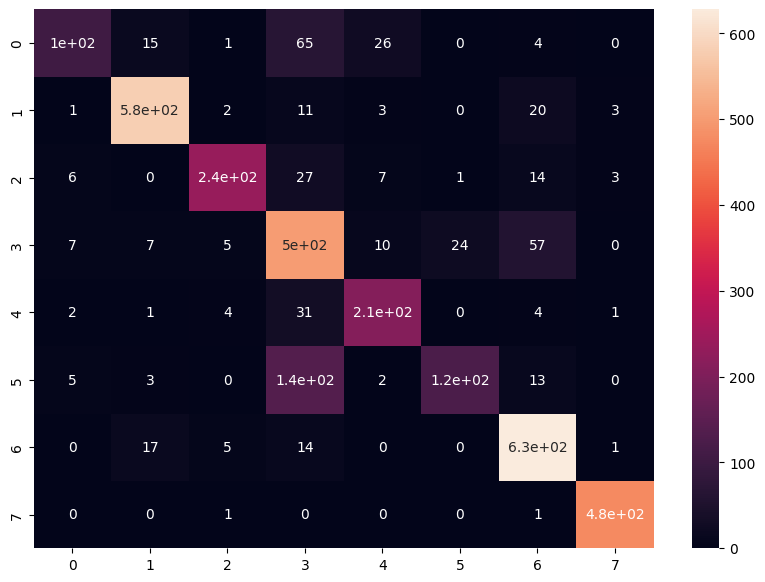

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

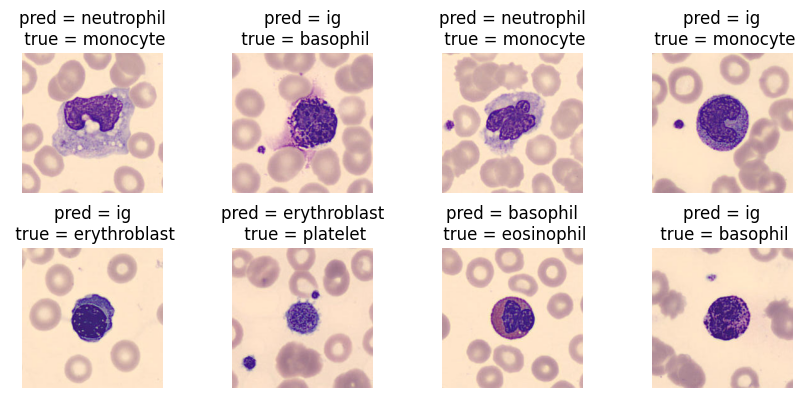

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 5: Stacking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ("rf",RandomForestClassifier(criterion="entropy",n_jobs=-1)),
    ("knn",KNeighborsClassifier(n_neighbors=k_valore,n_jobs=-1)),
    ("dt",DecisionTreeClassifier(criterion="entropy",max_depth=profondita_best))
]

ImportError: cannot import name 'DecisionTreeClassifier' from 'sklearn.ensemble' (/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/__init__.py)

In [ ]:
from sklearn.ensemble import StackingClassifier
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=20,solver="sag",n_jobs=-1,C=learning_rate),n_jobs=-1)
model.fit(X_train_pd.to_list(),y_train_pd)
y_pred=model.predict(X_test_pd.to_list())

NameError: name 'estimators' is not defined

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 6: Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = HistGradientBoostingClassifier(max_iter=5,n_iter_no_change=3,early_stopping=True)
param_grid = {
    "learning_rate": [1, 0.1, 0.01],
    "max_depth": [5, 7, 9],
}

In [ ]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring="accuracy",n_jobs=-1,cv=2)
grid_result=grid_search.fit(X_train_pd.to_list(),y_train_pd)

In [ ]:
print("Migliori parametri trovati:",grid_search.best_params_)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_val_pd.to_list())
accuracy = accuracy_score(y_val_pd, y_pred)
print("Accuracy sul val set:",accuracy)

In [ ]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

In [ ]:
model = HistGradientBoostingClassifier(max_iter=30,**grid_search.best_params_,n_iter_no_change=3,,early_stopping=True)
model

In [ ]:
model.fit(X_train_pd.to_list(),y_train_pd)
y_pred = grid_search.best_estimator_.predict(X_test_pd.to_list())

In [ ]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

In [ ]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,224,224).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 7: NeuralNetwork

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import optuna
import torch.optim as optim

class NeuralNetwork(nn.Module):
  def __init__(self,input_size=64*64*3,hidden_layers=[],n_layer=0,output_size=8):
    super(NeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    self.n_layer=n_layer
    for i in range(self.n_layer):
        self.layers.append(nn.Linear(input_size, hidden_layers[i]))
        input_size = hidden_layers[i]
    self.layers.append(nn.Linear(input_size, output_size))

  def forward(self, x):
    x = x.view(-1, 3*64*64)
    for layer in self.layers:
      x=F.leaky_relu(layer(x))
    return x

In [ ]:
model=NeuralNetwork(hidden_layers=[],n_layer=0).to(device)
model

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=12288, out_features=8, bias=True)
  )
)

In [ ]:
#Tuning iperparametri

def objective(trial):
    num_layers = trial.suggest_int("num_layers", 1, 10)
    hidden_layers = [trial.suggest_int(f"hidden_layer {i}", 8, 512,step=2) for i in range(num_layers)]
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1,log=True)

    model = NeuralNetwork(hidden_layers=hidden_layers,n_layer=num_layers).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    num_epoch=5
    for epoch in range(num_epoch):
        model.train()
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
      correct = 0
      for batch_idx, (images, labels) in enumerate(val_loader):
          images, labels = images.to(device), labels.to(device)
          output = model(images)
          _, pred = torch.max(output, 1)
          correct += (pred == labels).sum().item()
    return 100 * correct / len(val_loader.dataset)


study = optuna.create_study(direction="maximize")
study.optimize(objective,timeout=600)

[I 2024-06-28 08:02:05,641] A new study created in memory with name: no-name-f291d040-ffd8-4ebd-863a-7a61c5bc9390
[I 2024-06-28 08:02:09,510] Trial 0 finished with value: 54.38853130485664 and parameters: {'num_layers': 9, 'hidden_layer 0': 278, 'hidden_layer 1': 446, 'hidden_layer 2': 398, 'hidden_layer 3': 348, 'hidden_layer 4': 152, 'hidden_layer 5': 502, 'hidden_layer 6': 348, 'hidden_layer 7': 452, 'hidden_layer 8': 248, 'learning_rate': 3.9718730005956246e-05}. Best is trial 0 with value: 54.38853130485664.
[I 2024-06-28 08:02:13,385] Trial 1 finished with value: 18.695143358689293 and parameters: {'num_layers': 5, 'hidden_layer 0': 444, 'hidden_layer 1': 272, 'hidden_layer 2': 360, 'hidden_layer 3': 458, 'hidden_layer 4': 88, 'learning_rate': 0.025807287571057186}. Best is trial 0 with value: 54.38853130485664.
[I 2024-06-28 08:02:17,149] Trial 2 finished with value: 41.164423639555295 and parameters: {'num_layers': 9, 'hidden_layer 0': 186, 'hidden_layer 1': 64, 'hidden_layer 2

KeyboardInterrupt: 

In [ ]:
print(study.best_trial)
best_param=study.best_params
print("Migliori parametri:",best_param)

FrozenTrial(number=137, state=TrialState.COMPLETE, values=[61.907548273844355], datetime_start=datetime.datetime(2024, 6, 28, 7, 55, 16, 417099), datetime_complete=datetime.datetime(2024, 6, 28, 7, 55, 19, 269680), params={'num_layers': 2, 'hidden_layer 0': 160, 'hidden_layer 1': 396, 'learning_rate': 0.00027849742880400034}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_layers': IntDistribution(high=10, log=False, low=1, step=1), 'hidden_layer 0': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 1': IntDistribution(high=512, log=False, low=8, step=2), 'learning_rate': FloatDistribution(high=0.1, log=True, low=1e-05, step=None)}, trial_id=137, value=None)
Migliori parametri: {'num_layers': 2, 'hidden_layer 0': 160, 'hidden_layer 1': 396, 'learning_rate': 0.00027849742880400034}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
lr=best_param["learning_rate"]
num_layer=best_param["num_layers"]
hidden_layer=[]
for i in range(num_layer):
  hidden_layer.append(best_param[f"hidden_layer {i}"])


In [ ]:
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
model

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=12288, out_features=160, bias=True)
    (1): Linear(in_features=160, out_features=396, bias=True)
    (2): Linear(in_features=396, out_features=8, bias=True)
  )
)

In [ ]:
#test finale numero di epoche
def train_epoche(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [ ]:
def validate_epoche(loss_vector,accuracy_vector,model,loader,criterion):
  model.eval()
  val_loss, correct = 0, 0
  with torch.no_grad():
      for batch_idx,(images, labels) in enumerate(loader):
          images,labels =images.to(device),labels.to(device)
          output = model(images)

          loss=criterion(output,labels)
          val_loss+=loss.item() * images.size(0)

          _, pred=torch.max(output, 1)
          correct+=(pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")

  val_loss /= len(loader.dataset)
  accuracy = 100. * correct / len(loader.dataset)

  loss_vector.append(val_loss)
  accuracy_vector.append(accuracy)


In [ ]:
lossv,accv = [], []
num_epoch =25
for epoch in range(1, num_epoch + 1):
  criterion = nn.CrossEntropyLoss()
  model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
  train_epoche(epoch,model,lr,criterion)
  validate_epoche(lossv,accv,model,val_loader,criterion)

Epoch [1/1,100.00%], Batch [1/161,0.62%], Loss: 2.078664541244507
Epoch [1/1,100.00%], Batch [41/161,25.47%], Loss: 1.9350000619888306
Epoch [1/1,100.00%], Batch [81/161,50.31%], Loss: 1.8675544261932373
Epoch [1/1,100.00%], Batch [121/161,75.16%], Loss: 1.8928987979888916
Epoch [1/1,100.00%], Batch [161/161,100.00%], Loss: 2.0751194953918457
Accuracy: 44.82153306026916 %
Epoch [1/2,50.00%], Batch [1/161,0.62%], Loss: 1.8788970708847046
Epoch [1/2,50.00%], Batch [41/161,25.47%], Loss: 1.849975824356079
Epoch [1/2,50.00%], Batch [81/161,50.31%], Loss: 1.8204536437988281
Epoch [1/2,50.00%], Batch [121/161,75.16%], Loss: 1.9133691787719727
Epoch [1/2,50.00%], Batch [161/161,100.00%], Loss: 1.7234519720077515
Epoch [2/2,100.00%], Batch [1/161,0.62%], Loss: 1.8196744918823242
Epoch [2/2,100.00%], Batch [41/161,25.47%], Loss: 1.7730563879013062
Epoch [2/2,100.00%], Batch [81/161,50.31%], Loss: 1.7299476861953735
Epoch [2/2,100.00%], Batch [121/161,75.16%], Loss: 1.931707739830017
Epoch [2/2,

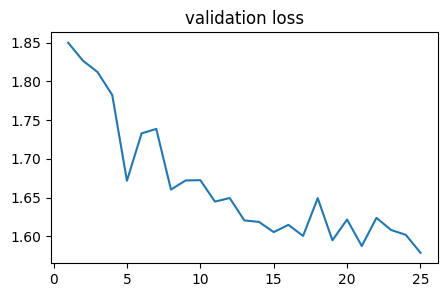

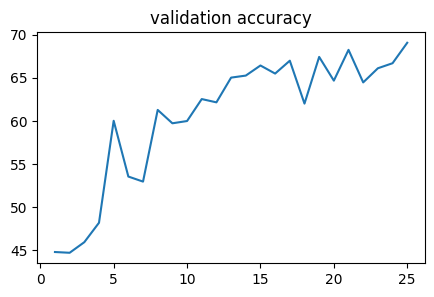

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),lossv)
plt.title("validation loss")

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),accv)
plt.title("validation accuracy");

In [ ]:
#miglior numero di epoche
num_epoch=np.argmin(lossv)+1
print(num_epoch)

25


In [ ]:
def train(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [ ]:
def validate(model,loader,criterion):
  y_pred = []
  y_true = []
  model.eval()
  with torch.no_grad():
      correct = 0
      for batch_idx,(images, labels) in enumerate(loader):
          images, labels = images.to(device), labels.to(device)
          output = model(images)
          _, pred = torch.max(output, 1)
          y_pred.extend(pred.cpu().numpy())
          y_true.extend(labels.cpu().numpy())
          correct += (pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")
  return y_pred,y_true

In [ ]:
pred,y_true = [], []
criterion = nn.CrossEntropyLoss()
model=NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer).to(device)
train(num_epoch,model,lr,criterion)
pred,y_true=validate(model,test_loader,criterion)

Epoch [1/25,4.00%], Batch [1/161,0.62%], Loss: 2.0762643814086914
Epoch [1/25,4.00%], Batch [41/161,25.47%], Loss: 1.9927473068237305
Epoch [1/25,4.00%], Batch [81/161,50.31%], Loss: 2.0401368141174316
Epoch [1/25,4.00%], Batch [121/161,75.16%], Loss: 1.9077391624450684
Epoch [1/25,4.00%], Batch [161/161,100.00%], Loss: 2.0026535987854004
Epoch [2/25,8.00%], Batch [1/161,0.62%], Loss: 1.886798620223999
Epoch [2/25,8.00%], Batch [41/161,25.47%], Loss: 1.8105183839797974
Epoch [2/25,8.00%], Batch [81/161,50.31%], Loss: 1.790107011795044
Epoch [2/25,8.00%], Batch [121/161,75.16%], Loss: 1.8353570699691772
Epoch [2/25,8.00%], Batch [161/161,100.00%], Loss: 1.9374557733535767
Epoch [3/25,12.00%], Batch [1/161,0.62%], Loss: 1.8363326787948608
Epoch [3/25,12.00%], Batch [41/161,25.47%], Loss: 1.7445900440216064
Epoch [3/25,12.00%], Batch [81/161,50.31%], Loss: 1.8245888948440552
Epoch [3/25,12.00%], Batch [121/161,75.16%], Loss: 1.7299617528915405
Epoch [3/25,12.00%], Batch [161/161,100.00%],

In [ ]:
print(np.unique(y_true,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([241, 607, 308, 565, 231, 298, 705, 464]))


In [ ]:
from sklearn.metrics import classification_report,precision_score,accuracy_score
print("Accuracy score: ",accuracy_score(y_true,pred))
report = classification_report(y_true,pred)
print(f"Classification Report: \n{report}")

Accuracy score:  0.5902310617139515
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       241
           1       0.65      0.90      0.75       607
           2       0.00      0.00      0.00       308
           3       0.39      0.91      0.55       565
           4       0.53      0.59      0.56       231
           5       0.00      0.00      0.00       298
           6       0.72      0.51      0.60       705
           7       0.92      0.99      0.95       464

    accuracy                           0.59      3419
   macro avg       0.40      0.49      0.43      3419
weighted avg       0.49      0.59      0.51      3419



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



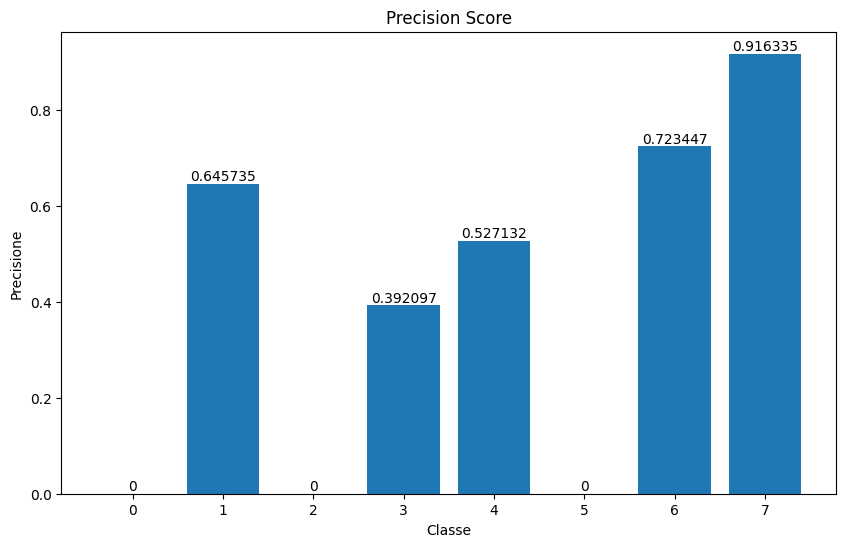

In [ ]:
classe=np.arange(0,8)
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_true,pred,average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

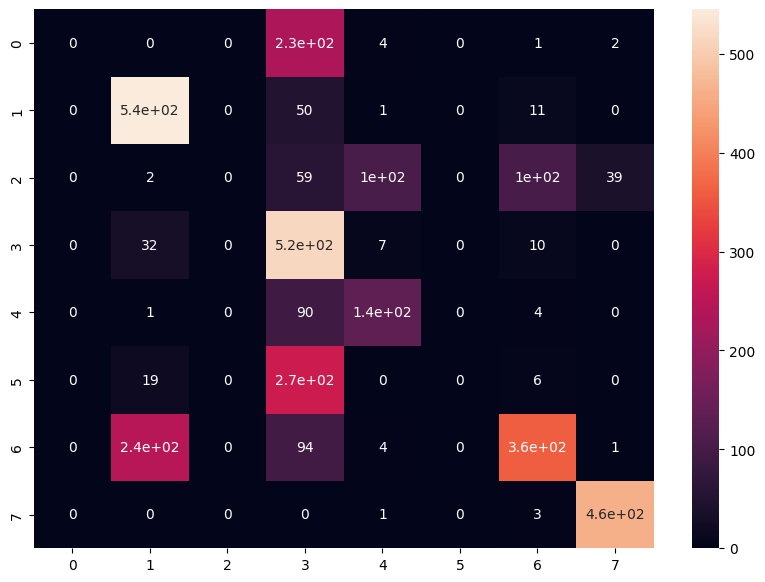

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

#Modello 8: Convolutional neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import optuna
import torch.optim as optim

class Conv_NeuralNetwork(nn.Module):
  def __init__(self,input_size=3,hidden_layers=[],n_layer=0,output_size=8,image_size=(64,64)):
    super(Conv_NeuralNetwork,self).__init__()
    self.layers = nn.ModuleList()
    self.n_layer=n_layer
    input=input_size
    for i in range(n_layer):
      if i%2==0:
        self.layers.append(nn.Sequential(nn.Conv2d(in_channels=input,out_channels=hidden_layers[i],kernel_size=(3,3),padding=1),
                                         nn.LeakyReLU()
                                         ))
      else:
        self.layers.append(nn.Sequential(nn.Conv2d(in_channels=input,out_channels=hidden_layers[i],kernel_size=(3,3),padding=1),
                                         nn.LeakyReLU(),
                                         nn.MaxPool2d(kernel_size=(2,2))
                                         ))
      input=hidden_layers[i]

    output_layer_size=self.output_layer(image_size)
    self.layers.append(nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input*output_layer_size,out_features=output_size)
    ))

  def output_layer(self,image_size):
    h,w=image_size
    for i in range(self.n_layer):
      if i%2==0:
         h=(h-3+2*1)//1+1
         w=(w-3+2*1)//1+1
      else:
        h=((h-3+2*1)//1+1)//2
        w=((w-3+2*1)//1+1)//2
    return w*h

  def forward(self, x):
    for layer in self.layers:
      x=layer(x)
    return x

In [ ]:
model=Conv_NeuralNetwork(hidden_layers=[],n_layer=0,image_size=(64,64)).to(device)
model

Conv_NeuralNetwork(
  (layers): ModuleList(
    (0): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=12288, out_features=8, bias=True)
    )
  )
)

In [ ]:
#Tuning iperparametri

def objective(trial):
    num_layers = trial.suggest_int("num_layers", 1, 10)
    hidden_layers = [trial.suggest_int(f"hidden_layer {i}", 8, 512,step=2) for i in range(num_layers)]
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1,log=True)

    model=Conv_NeuralNetwork(hidden_layers=hidden_layers,n_layer=num_layers,image_size=(64,64)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    num_epoch=5
    for epoch in range(num_epoch):
        model.train()
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
      correct = 0
      for batch_idx,(images,labels) in enumerate(val_loader):
          images,labels = images.to(device),labels.to(device)
          output =model(images)
          _, pred =torch.max(output,1)
          correct +=(pred==labels).sum().item()
    return 100 * correct / len(val_loader.dataset)


study = optuna.create_study(direction="maximize")
study.optimize(objective,timeout=600*3)

[I 2024-06-28 09:32:05,663] A new study created in memory with name: no-name-87deef19-dc2f-455b-86f3-710012919b04
[I 2024-06-28 09:36:13,653] Trial 0 finished with value: 81.88999414862492 and parameters: {'num_layers': 10, 'hidden_layer 0': 360, 'hidden_layer 1': 362, 'hidden_layer 2': 284, 'hidden_layer 3': 362, 'hidden_layer 4': 392, 'hidden_layer 5': 144, 'hidden_layer 6': 416, 'hidden_layer 7': 380, 'hidden_layer 8': 36, 'hidden_layer 9': 12, 'learning_rate': 0.0002058459676542257}. Best is trial 0 with value: 81.88999414862492.
[I 2024-06-28 09:38:25,644] Trial 1 finished with value: 36.1029842012873 and parameters: {'num_layers': 5, 'hidden_layer 0': 54, 'hidden_layer 1': 360, 'hidden_layer 2': 392, 'hidden_layer 3': 154, 'hidden_layer 4': 196, 'learning_rate': 0.01871249813525024}. Best is trial 0 with value: 81.88999414862492.
[I 2024-06-28 09:40:21,917] Trial 2 finished with value: 79.02282036278525 and parameters: {'num_layers': 6, 'hidden_layer 0': 150, 'hidden_layer 1': 18

In [ ]:
print(study.best_trial)
best_param=study.best_params
print("Migliori parametri:",best_param)

FrozenTrial(number=15, state=TrialState.COMPLETE, values=[89.40901111761264], datetime_start=datetime.datetime(2024, 6, 28, 10, 0, 28, 909128), datetime_complete=datetime.datetime(2024, 6, 28, 10, 4, 4, 714899), params={'num_layers': 4, 'hidden_layer 0': 432, 'hidden_layer 1': 264, 'hidden_layer 2': 512, 'hidden_layer 3': 52, 'learning_rate': 0.0006606605047133331}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_layers': IntDistribution(high=10, log=False, low=1, step=1), 'hidden_layer 0': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 1': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 2': IntDistribution(high=512, log=False, low=8, step=2), 'hidden_layer 3': IntDistribution(high=512, log=False, low=8, step=2), 'learning_rate': FloatDistribution(high=0.1, log=True, low=1e-05, step=None)}, trial_id=15, value=None)
Migliori parametri: {'num_layers': 4, 'hidden_layer 0': 432, 'hidden_layer 1': 264, 'hidden_layer 2': 512,

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
lr=best_param["learning_rate"]
num_layer=best_param["num_layers"]
hidden_layer=[]
for i in range(num_layer):
  hidden_layer.append(best_param[f"hidden_layer {i}"])

In [ ]:
model=Conv_NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer,image_size=(64,64)).to(device)
model

Conv_NeuralNetwork(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 432, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(432, 264, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(264, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(512, 52, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=13312, out_features=8, bias=True)
    )
  )
)

In [ ]:
#test finale numero di epoche
def train_epoche(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [ ]:
def validate_epoche(loss_vector,accuracy_vector,model,loader,criterion):
  model.eval()
  val_loss, correct = 0, 0
  with torch.no_grad():
      for batch_idx,(images, labels) in enumerate(loader):
          images,labels =images.to(device),labels.to(device)
          output = model(images)

          loss=criterion(output,labels)
          val_loss+=loss.item() * images.size(0)

          _, pred=torch.max(output, 1)
          correct+=(pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")

  val_loss /= len(loader.dataset)
  accuracy = 100. * correct / len(loader.dataset)

  loss_vector.append(val_loss)
  accuracy_vector.append(accuracy)


In [ ]:
lossv,accv = [], []
num_epoch =10
for epoch in range(1, num_epoch + 1):
  criterion = nn.CrossEntropyLoss()
  model=Conv_NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer,image_size=(64,64)).to(device)
  train_epoche(epoch,model,lr,criterion)
  validate_epoche(lossv,accv,model,val_loader,criterion)

Epoch [1/1,100.00%], Batch [1/161,0.62%], Loss: 2.0804529190063477
Epoch [1/1,100.00%], Batch [41/161,25.47%], Loss: 1.7097742557525635
Epoch [1/1,100.00%], Batch [81/161,50.31%], Loss: 0.9953047633171082
Epoch [1/1,100.00%], Batch [121/161,75.16%], Loss: 0.7772428393363953
Epoch [1/1,100.00%], Batch [161/161,100.00%], Loss: 0.7950120568275452
Accuracy: 78.17437097717963 %
Epoch [1/2,50.00%], Batch [1/161,0.62%], Loss: 2.0804312229156494
Epoch [1/2,50.00%], Batch [41/161,25.47%], Loss: 1.6821259260177612
Epoch [1/2,50.00%], Batch [81/161,50.31%], Loss: 1.1206140518188477
Epoch [1/2,50.00%], Batch [121/161,75.16%], Loss: 0.8123025298118591
Epoch [1/2,50.00%], Batch [161/161,100.00%], Loss: 0.9923945665359497
Epoch [2/2,100.00%], Batch [1/161,0.62%], Loss: 0.7857350707054138
Epoch [2/2,100.00%], Batch [41/161,25.47%], Loss: 0.501585066318512
Epoch [2/2,100.00%], Batch [81/161,50.31%], Loss: 0.5297869443893433
Epoch [2/2,100.00%], Batch [121/161,75.16%], Loss: 0.4186209440231323
Epoch [2/

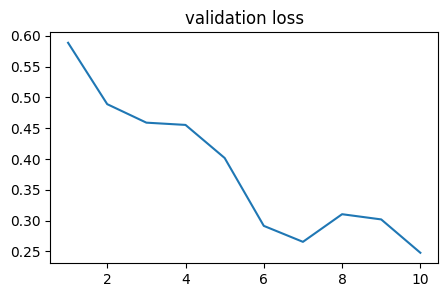

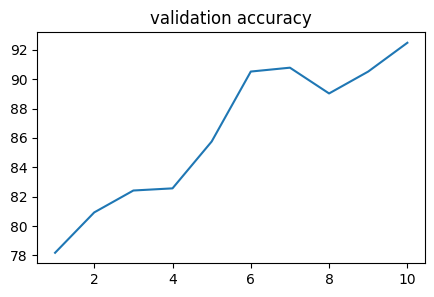

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),lossv)
plt.title("validation loss")

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),accv)
plt.title("validation accuracy");

In [ ]:
#miglior numero di epoche
num_epoch=np.argmin(lossv)+1
print(num_epoch)

10


In [ ]:
def train(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [ ]:
def validate(model,loader,criterion):
  y_pred = []
  y_true = []
  model.eval()
  with torch.no_grad():
      correct = 0
      for batch_idx,(images, labels) in enumerate(loader):
          images, labels = images.to(device), labels.to(device)
          output = model(images)
          _, pred = torch.max(output, 1)
          y_pred.extend(pred.cpu().numpy())
          y_true.extend(labels.cpu().numpy())
          correct += (pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")
  return y_pred,y_true

In [ ]:
pred,y_true = [], []
criterion = nn.CrossEntropyLoss()
model=Conv_NeuralNetwork(hidden_layers=hidden_layer,n_layer=num_layer,image_size=(64,64)).to(device)
train(num_epoch,model,lr,criterion)
pred,y_true=validate(model,test_loader,criterion)

Epoch [1/10,10.00%], Batch [1/161,0.62%], Loss: 2.0751492977142334
Epoch [1/10,10.00%], Batch [41/161,25.47%], Loss: 1.8075283765792847
Epoch [1/10,10.00%], Batch [81/161,50.31%], Loss: 1.3142080307006836
Epoch [1/10,10.00%], Batch [121/161,75.16%], Loss: 1.0323631763458252
Epoch [1/10,10.00%], Batch [161/161,100.00%], Loss: 1.058979868888855
Epoch [2/10,20.00%], Batch [1/161,0.62%], Loss: 0.8217490315437317
Epoch [2/10,20.00%], Batch [41/161,25.47%], Loss: 0.7967154383659363
Epoch [2/10,20.00%], Batch [81/161,50.31%], Loss: 0.5524918437004089
Epoch [2/10,20.00%], Batch [121/161,75.16%], Loss: 0.5629991888999939
Epoch [2/10,20.00%], Batch [161/161,100.00%], Loss: 0.47632089257240295
Epoch [3/10,30.00%], Batch [1/161,0.62%], Loss: 0.6425435543060303
Epoch [3/10,30.00%], Batch [41/161,25.47%], Loss: 0.5801339745521545
Epoch [3/10,30.00%], Batch [81/161,50.31%], Loss: 0.34694287180900574
Epoch [3/10,30.00%], Batch [121/161,75.16%], Loss: 0.40121331810951233
Epoch [3/10,30.00%], Batch [161

In [ ]:
from sklearn.metrics import classification_report,precision_score,accuracy_score
print("Accuracy score: ",accuracy_score(y_true,pred))
report = classification_report(y_true,pred)
print(f"Classification Report: \n{report}")

Accuracy score:  0.9295115530856976
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       241
           1       0.97      0.99      0.98       607
           2       0.97      0.91      0.94       308
           3       0.86      0.82      0.84       565
           4       0.90      0.97      0.93       231
           5       0.80      0.88      0.84       298
           6       0.95      0.97      0.96       705
           7       1.00      1.00      1.00       464

    accuracy                           0.93      3419
   macro avg       0.92      0.92      0.92      3419
weighted avg       0.93      0.93      0.93      3419



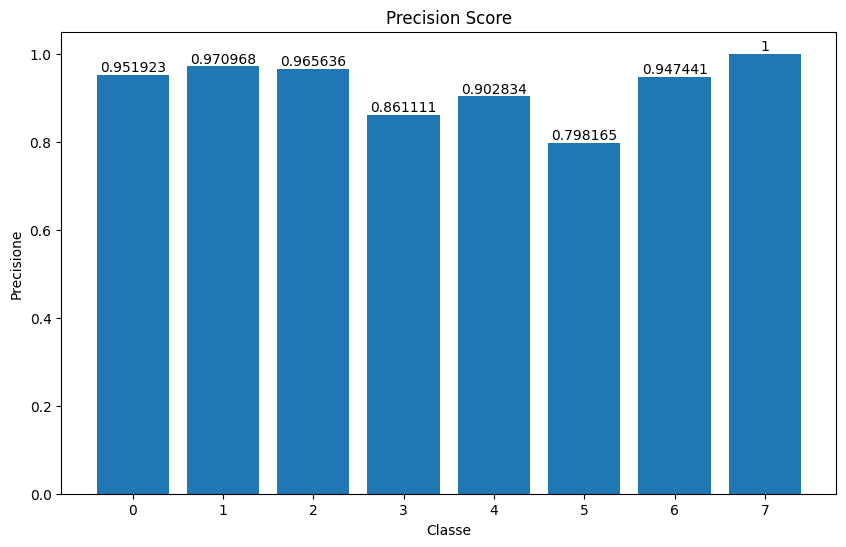

In [ ]:
classe=np.arange(0,8)
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_true,pred,average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

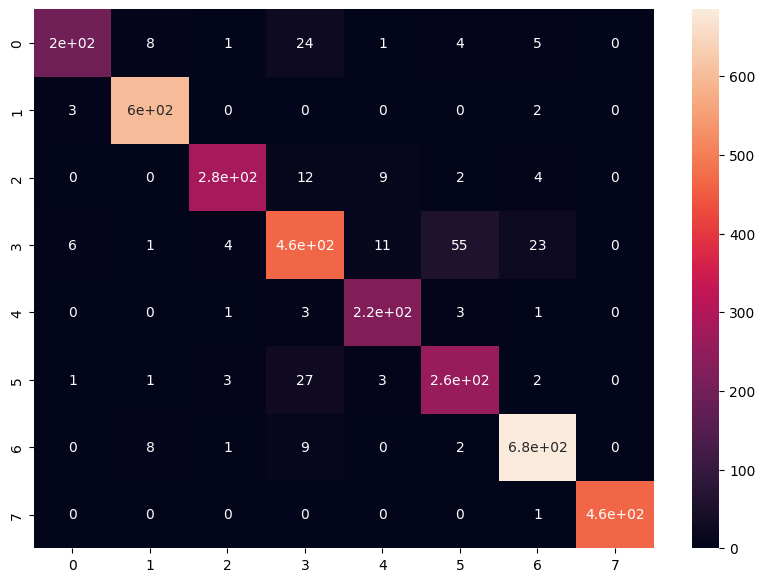

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

#Stato dell' arte: ResNet50

In [21]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

resnet=models.resnet50(weights="ResNet50_Weights.DEFAULT")

In [22]:
model = resnet.to(device)
resnet.eval()
with torch.no_grad():
    correct = 0
    for batch_idx,(images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, pred = torch.max(output, 1)
        correct += (pred == labels).sum().item()
    print(f"Accuracy: {100 * correct / len(test_loader.dataset)} %")


Accuracy: 0.0 %


In [23]:
#modifico l' output
in_features = resnet.fc.in_features
resnet.fc = torch.nn.Linear(in_features, 8)

In [24]:
#test finale numero di epoche
def train_epoche(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)
  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [25]:
def validate_epoche(loss_vector,accuracy_vector,model,loader,criterion):
  model.eval()
  val_loss, correct = 0, 0
  with torch.no_grad():
      for batch_idx,(images, labels) in enumerate(loader):
          images,labels =images.to(device),labels.to(device)
          output = model(images)

          loss=criterion(output,labels)
          val_loss+=loss.item() * images.size(0)

          _, pred=torch.max(output, 1)
          correct+=(pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")

  val_loss /= len(loader.dataset)
  accuracy = 100. * correct / len(loader.dataset)

  loss_vector.append(val_loss)
  accuracy_vector.append(accuracy)

In [ ]:
lossv,accv = [], []
num_epoch =10

for epoch in range(1, num_epoch + 1):
  model = resnet.to(device)
  criterion = nn.CrossEntropyLoss()
  train_epoche(epoch,model,0.0001,criterion)
  validate_epoche(lossv,accv,model,val_loader,criterion)

Epoch [1/1,100.00%], Batch [1/161,0.62%], Loss: 2.152611255645752
Epoch [1/1,100.00%], Batch [41/161,25.47%], Loss: 1.0142606496810913
Epoch [1/1,100.00%], Batch [81/161,50.31%], Loss: 0.3061216175556183


In [ ]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),lossv)
plt.title("validation loss")

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,num_epoch+1),accv)
plt.title("validation accuracy");

In [ ]:
#miglior numero di epoche
num_epoch=np.argmin(lossv)+1
print(num_epoch)

In [ ]:
def train(num_epoch,model,lr,criterion):
  optimizer = optim.Adam(model.parameters(),lr=lr)

  for epoch in range(num_epoch):
          model.train()
          for batch_idx, (images, labels) in enumerate(train_loader):
              images, labels = images.to(device), labels.to(device)
              optimizer.zero_grad()
              output = model(images)
              loss = criterion(output, labels)
              loss.backward()
              optimizer.step()
              if batch_idx%40==0:
                print(f"Epoch [{epoch+1}/{num_epoch},{((epoch+1)/num_epoch)*100:.2f}%], Batch [{batch_idx+1}/{len(train_loader)},{((batch_idx+1)/len(train_loader))*100:.2f}%], Loss: {loss.data.item()}")


In [ ]:
def validate(model,loader,criterion):
  y_pred = []
  y_true = []
  model.eval()
  with torch.no_grad():
      correct = 0
      for batch_idx,(images, labels) in enumerate(loader):
          images, labels = images.to(device), labels.to(device)
          output = model(images)
          _, pred = torch.max(output, 1)
          y_pred.extend(pred.cpu().numpy())
          y_true.extend(labels.cpu().numpy())
          correct += (pred == labels).sum().item()
      print(f"Accuracy: {100 * correct / len(loader.dataset)} %")
  return y_pred,y_true

In [ ]:
pred,y_true = [], []
model = resnet.to(device)
criterion = nn.CrossEntropyLoss()
train(num_epoch,model,0.0001,criterion)
pred,y_true=validate(model,test_loader,criterion)

In [ ]:
from sklearn.metrics import classification_report,precision_score,accuracy_score
print("Accuracy score: ",accuracy_score(y_true,pred))
report = classification_report(y_true,pred)
print(f"Classification Report: \n{report}")

In [ ]:
classe=np.arange(0,8)
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_true,pred,average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()